In [1]:
%matplotlib inline
import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn import cluster
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from pathlib import Path
import librosa, librosa.display
import IPython.lib.display as ipd


# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
musicdf = pd.read_csv('./musicdf30.csv', index_col=0, encoding='latin-1')

In [3]:
musicdf.columns

Index(['composer', 'description', 'symphony', 'file', 'part', 'tempo', 'bpm',
       'duration', 'zero_crossings', 'spectral_centroid_avg',
       'spectral_bw_avg', 'Chroma_A', 'Chroma_A#', 'Chroma_B', 'Chroma_C',
       'Chroma_C#', 'Chroma_D', 'Chroma_D#', 'Chroma_E', 'Chroma_F',
       'Chroma_F#', 'Chroma_G', 'Chroma_G#', 'MFCC_0', 'MFCC_1', 'MFCC_10',
       'MFCC_11', 'MFCC_2', 'MFCC_3', 'MFCC_4', 'MFCC_5', 'MFCC_6', 'MFCC_7',
       'MFCC_8', 'MFCC_9', 'MFCC_SD_0', 'MFCC_SD_1', 'MFCC_SD_10',
       'MFCC_SD_11', 'MFCC_SD_2', 'MFCC_SD_3', 'MFCC_SD_4', 'MFCC_SD_5',
       'MFCC_SD_6', 'MFCC_SD_7', 'MFCC_SD_8', 'MFCC_SD_9', 'Chroma_SD_A',
       'Chroma_SD_A#', 'Chroma_SD_B', 'Chroma_SD_C', 'Chroma_SD_C#',
       'Chroma_SD_D', 'Chroma_SD_D#', 'Chroma_SD_E', 'Chroma_SD_F',
       'Chroma_SD_F#', 'Chroma_SD_G', 'Chroma_SD_G#'],
      dtype='object')

In [ ]:
#Not using the Tempo labels. I am not sure if it adds any value
#musicdf = pd.concat([musicdf, pd.get_dummies(musicdf['tempo'],  drop_first=True)], axis=1)

In [4]:
# Subset of columns that would be used for clustering
feature_cols = musicdf.columns.drop(['composer', 'description', 'symphony', 'tempo', 'file', 'part', 'duration']);
#                                    + ['zero_crossings']
#+ ['MFCC_0', 'MFCC_1', 'MFCC_10', 'MFCC_11', 'MFCC_2', 'MFCC_3', 'MFCC_4',
#       'MFCC_5', 'MFCC_6', 'MFCC_7', 'MFCC_8', 'MFCC_9', 'MFCC_SD_0',
#       'MFCC_SD_1', 'MFCC_SD_10', 'MFCC_SD_11', 'MFCC_SD_2', 'MFCC_SD_3',
#       'MFCC_SD_4', 'MFCC_SD_5', 'MFCC_SD_6', 'MFCC_SD_7', 'MFCC_SD_8',
#       'MFCC_SD_9']);
#+ ['Chroma_A', 'Chroma_A#', 'Chroma_B', 'Chroma_C', 'Chroma_C#',
#       'Chroma_D', 'Chroma_D#', 'Chroma_E', 'Chroma_F', 'Chroma_F#',
#       'Chroma_G', 'Chroma_G#', 'Chroma_SD_A', 'Chroma_SD_A#', 'Chroma_SD_B',
#       'Chroma_SD_C', 'Chroma_SD_C#', 'Chroma_SD_D', 'Chroma_SD_D#',
#       'Chroma_SD_E', 'Chroma_SD_F', 'Chroma_SD_F#', 'Chroma_SD_G',
#       'Chroma_SD_G#'])

In [5]:
feature_cols

Index(['bpm', 'zero_crossings', 'spectral_centroid_avg', 'spectral_bw_avg',
       'Chroma_A', 'Chroma_A#', 'Chroma_B', 'Chroma_C', 'Chroma_C#',
       'Chroma_D', 'Chroma_D#', 'Chroma_E', 'Chroma_F', 'Chroma_F#',
       'Chroma_G', 'Chroma_G#', 'MFCC_0', 'MFCC_1', 'MFCC_10', 'MFCC_11',
       'MFCC_2', 'MFCC_3', 'MFCC_4', 'MFCC_5', 'MFCC_6', 'MFCC_7', 'MFCC_8',
       'MFCC_9', 'MFCC_SD_0', 'MFCC_SD_1', 'MFCC_SD_10', 'MFCC_SD_11',
       'MFCC_SD_2', 'MFCC_SD_3', 'MFCC_SD_4', 'MFCC_SD_5', 'MFCC_SD_6',
       'MFCC_SD_7', 'MFCC_SD_8', 'MFCC_SD_9', 'Chroma_SD_A', 'Chroma_SD_A#',
       'Chroma_SD_B', 'Chroma_SD_C', 'Chroma_SD_C#', 'Chroma_SD_D',
       'Chroma_SD_D#', 'Chroma_SD_E', 'Chroma_SD_F', 'Chroma_SD_F#',
       'Chroma_SD_G', 'Chroma_SD_G#'],
      dtype='object')

In [6]:
musicdf.shape

(61, 59)

In [7]:
df = musicdf[feature_cols]

In [ ]:
df.corr().abs()

In [8]:
df.shape

(61, 52)

In [9]:
## https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas
df.is_copy = False

In [10]:
df.head()

,bpm,zero_crossings,spectral_centroid_avg,spectral_bw_avg,Chroma_A,Chroma_A#,Chroma_B,Chroma_C,Chroma_C#,Chroma_D,...,Chroma_SD_B,Chroma_SD_C,Chroma_SD_C#,Chroma_SD_D,Chroma_SD_D#,Chroma_SD_E,Chroma_SD_F,Chroma_SD_F#,Chroma_SD_G,Chroma_SD_G#
0,120.185320,98094,621.574748,881.923976,0.332951,0.259815,0.141876,0.174059,0.235315,0.191668,...,0.175779,0.193223,0.195864,0.210012,0.152202,0.207500,0.167383,0.110378,0.088626,0.167561
1,120.185320,110224,542.039355,786.222804,0.290640,0.240599,0.161060,0.160480,0.317350,0.362431,...,0.197480,0.148901,0.147744,0.189628,0.138035,0.170995,0.157763,0.167537,0.135463,0.170640
2,117.453835,214944,701.140112,1004.938233,0.142641,0.218776,0.334959,0.281933,0.138918,0.170627,...,0.169860,0.132680,0.120317,0.154430,0.158160,0.156281,0.122567,0.140689,0.124910,0.123183
3,112.347147,203680,631.094119,794.234902,0.204072,0.225538,0.225666,0.225116,0.312408,0.398074,...,0.166632,0.175509,0.142637,0.183892,0.158628,0.137726,0.137628,0.148855,0.166665,0.141932
4,120.185320,118904,570.265597,737.010028,0.309478,0.416477,0.272851,0.067138,0.121657,0.338595,...,0.119192,0.095741,0.103875,0.100934,0.081791,0.107883,0.133893,0.125197,0.166297,0.131250


In [12]:
Z = linkage(df[feature_cols], method='ward')

In [13]:
Z.shape

(60, 4)

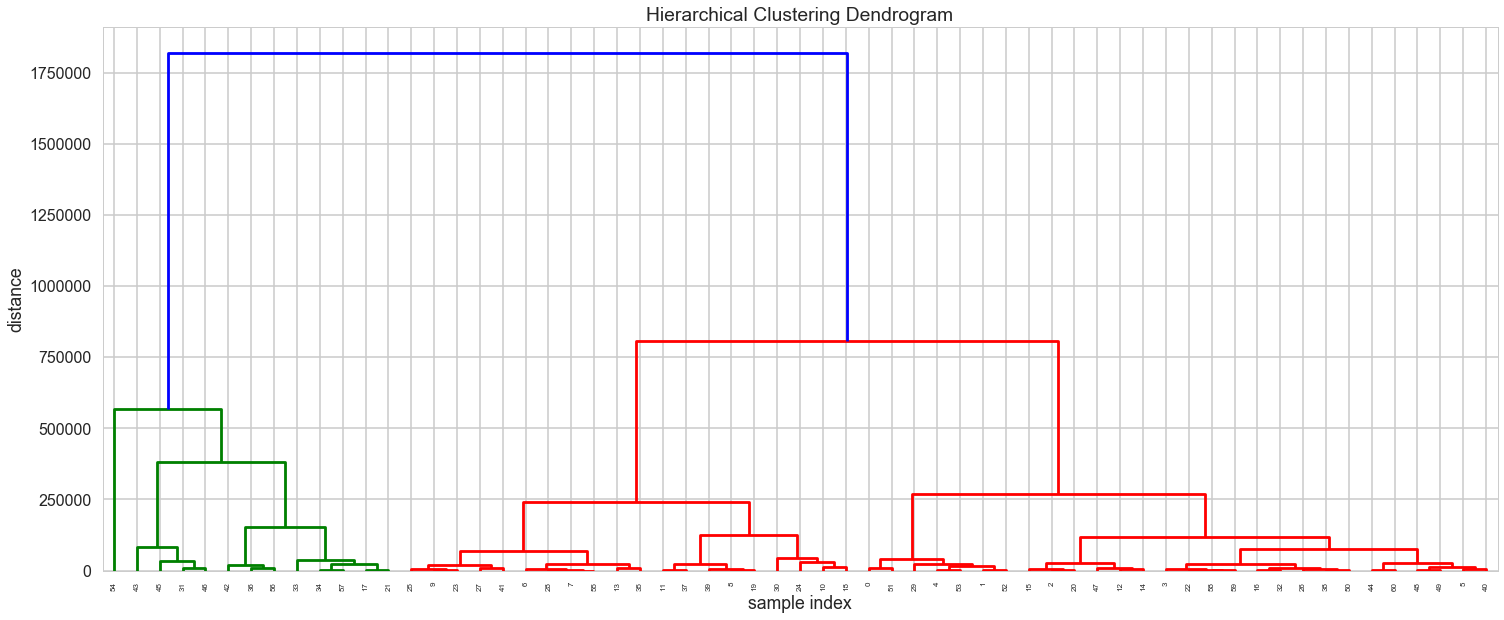

In [14]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [18]:
# set cut-off
max_d = 500000 

In [16]:
#https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

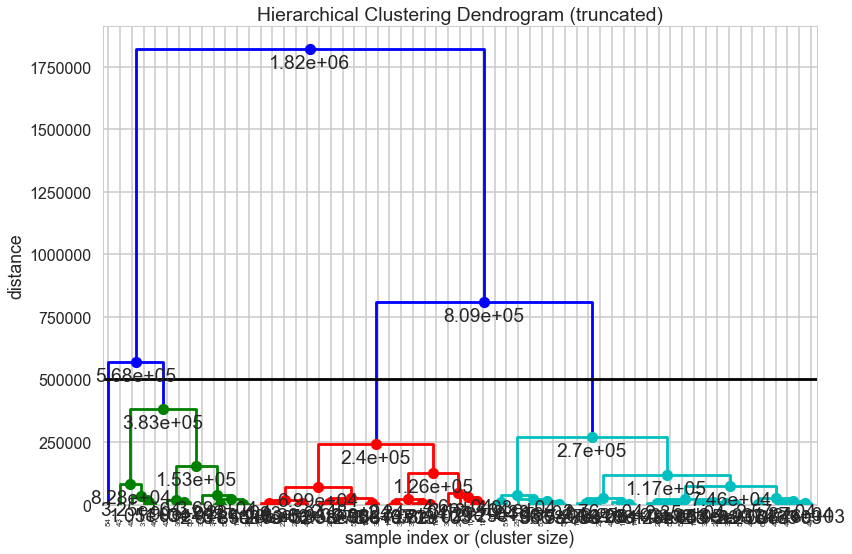

In [19]:
fancy_dendrogram(
    Z,
    #truncate_mode='lastp',
    #p=12,
    leaf_rotation=90.,
    leaf_font_size=8,
    #show_contracted=True,
    #annotate_above=10,
    max_d=max_d,  # plot a horizontal cut-off line
)
plt.show()

In [20]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')
type(clusters[0])

numpy.int32

In [21]:
clusters.shape

(61,)

In [22]:
if 'cluster' in df.columns:
    df.drop('cluster', axis=1, inplace=True)

In [23]:
df = pd.concat([df , pd.DataFrame(clusters)], axis=1)

In [24]:
df.rename(columns={0: 'cluster'}, inplace=True)

In [25]:
clusters = df.groupby('cluster')

In [121]:
mp3dir = 'piano_first_thirty_sec'
def loadmp3(audio_path):
    audio_path = '.\\'+ mp3dir + '\\' + audio_path
    my_file = Path(audio_path)
    if my_file.is_file():
        return librosa.load(audio_path, sr=None)
    else:
        return None, None

In [26]:
for name, group in clusters:
    print('Group : '+str(name))
    songs = musicdf.iloc[clusters.get_group(name).index]
    for index, row in songs.iterrows():
        print(row['composer']+' '+row['file'])
    print('')
        #x, sr = loadmp3(row['file'])
        #IPython.display.Audio(x, rate=sr)

Group : 1
balak islamei.mp3
beethoven pathetique_1.mp3
beethoven waldstein_1.mp3
beethoven waldstein_3.mp3
beethoven appass_1.mp3
beethoven appass_3.mp3
beethoven beethoven_opus90_2.mp3
beethoven beethoven_hammerklavier_1.mp3
beethoven beethoven_hammerklavier_3.mp3
beethoven beethoven_hammerklavier_4.mp3
brahms brahms_opus1_3.mp3
brahms brahms_opus1_4.mp3

Group : 2
brahms brahms_opus1_1.mp3

Group : 3
albeniz alb_se1.mp3
albeniz alb_se2.mp3
albeniz alb_se3.mp3
albeniz alb_se4.mp3
albeniz alb_se5.mp3
albeniz alb_se6.mp3
albeniz alb_se8.mp3
beethoven beethoven_opus10_1.mp3
beethoven beethoven_opus10_2.mp3
beethoven pathetique_3.mp3
beethoven beethoven_opus22_1.mp3
beethoven beethoven_opus22_2.mp3
beethoven beethoven_opus22_4.mp3
beethoven mond_1.mp3
beethoven mond_3.mp3
beethoven appass_2.mp3
beethoven beethoven_les_adieux_1.mp3
beethoven beethoven_les_adieux_3.mp3
beethoven beethoven_opus90_1.mp3
brahms brahms_opus1_2.mp3

Group : 4
albeniz alb_esp1.mp3
albeniz alb_esp2.mp3
albeniz alb